In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [33]:
df["pcv"].value_counts()

41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: pcv, dtype: int64

In [7]:
df[df["pcv"] == "\t?"]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
66,66,67.0,70.0,1.02,2.0,0.0,abnormal,normal,notpresent,notpresent,...,\t?,NaN,NaN,yes,yes,no,good,yes,no,ckd


In [22]:
pcv_list = df["pcv"].values
for i in range(len(pcv_list)):
    if "\t" in str(pcv_list[i]):
        pcv_list[i] = str(pcv_list[i]).replace("\t", '')
    if "?" in str(pcv_list[i]):
        pcv_list[i] = str(pcv_list[i]).replace("?", '')
    if pcv_list[i] is not np.nan and pcv_list[i] != '':
        pcv_list[i] = int(pcv_list[i])
    elif pcv_list[i] == '':
        pcv_list[i] = None

In [23]:
pcv_list

array([44, 38, 31, 32, 35, 39, 36, 44, 33, 29, 28, 32, 28, nan, 16, 24,
       nan, nan, 37, 30, 24, 32, 32, nan, 39, 29, 35, 37, nan, 38, nan,
       30, 34, 29, nan, 36, 32, 28, nan, 40, 32, nan, 33, 24, 28, nan, 37,
       45, 29, 29, 28, 33, 34, 40, 40, 28, 30, nan, 33, nan, nan, nan, 33,
       27, nan, 48, None, nan, 37, 52, 44, 28, nan, 14, 29, nan, 36, 34,
       30, 40, 31, 29, nan, nan, 22, nan, nan, 32, nan, nan, 40, 52, 33,
       30, 36, nan, 36, 32, 18, 32, nan, 33, 52, 36, nan, 42, 17, 34, 37,
       nan, 34, 32, 33, nan, nan, 44, nan, 37, nan, nan, nan, 46, nan, 42,
       28, nan, 37, 35, 23, nan, 22, 36, 24, 37, 33, 39, nan, 29, nan, 33,
       nan, 19, nan, nan, 33, 24, nan, 25, nan, 32, 41, 30, 32, 22, 26,
       36, nan, 39, 31, 35, 35, 42, 37, 27, 40, nan, nan, 42, 39, 27, 33,
       26, 34, 41, 35, nan, 23, 41, 34, 39, 28, 30, 35, nan, 31, 34, nan,
       34, 38, 29, 30, 26, nan, 15, nan, nan, 24, nan, 30, 25, 37, 21, 24,
       nan, 31, 43, 41, 41, 41, nan, 20, 

In [34]:
df['pcv1'] = df["pcv"].str.replace("\t", "", regex=False).replace("?", "", regex=False)

In [38]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,pcv1
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,44
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,38
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,31
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,32
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,6700,4.9,no,no,no,good,no,no,notckd,47
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,7800,6.2,no,no,no,good,no,no,notckd,54
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,6600,5.4,no,no,no,good,no,no,notckd,49
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,7200,5.9,no,no,no,good,no,no,notckd,51


In [39]:
df = df.drop(["id"], axis=1)

In [40]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,pcv1
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800,5.2,yes,yes,no,good,no,no,ckd,44
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000,NaN,no,no,no,good,no,no,ckd,38
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500,NaN,no,yes,no,poor,no,yes,ckd,31
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,32
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300,4.6,no,no,no,good,no,no,ckd,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,6700,4.9,no,no,no,good,no,no,notckd,47
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,7800,6.2,no,no,no,good,no,no,notckd,54
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,6600,5.4,no,no,no,good,no,no,notckd,49
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,7200,5.9,no,no,no,good,no,no,notckd,51


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [60]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [50]:
df['pcv'] = df["pcv"].str.replace("\t", "", regex=False).replace("?", "", regex=False).replace("", None).astype(float)

In [51]:
df['wc'] = df["wc"].str.replace("\t", "", regex=False).replace("?", "", regex=False).replace("", None).astype(float)

In [53]:
df['rc'] = df["rc"].str.replace("\t", "", regex=False).replace("?", "", regex=False).replace("", None).astype(float)

In [61]:
mapper_for_all_column = {
    "rbc" : {"normal" : 0, "abnormal" : 1},
    "pc" : {"normal" : 0, "abnormal" : 1},
    "pcc" : {"present" : 1, "notpresent" : 0},
    "ba" : {"present" : 1, "notpresent" : 0},
    "htn" : {"yes" : 1, "no" : 0},
    "dm" : {"yes" : 1, "no" : 0, "\tno" : 0, "\tyes" : 1, " yes" : 1},
    "cad" : {"yes" : 1, "no" : 0, "\tno" : 0},
    "appet" : {"good" : 1, "poor" : 0},
    "pe" : {"yes" : 1, "no" : 0},
    "ane" : {"yes" : 1, "no" : 0},
    "classification" : {"ckd" : "ckd", "notckd" : "notckd", "ckd\t" : "ckd"}
}

In [62]:
df = df.drop(["pcv1"], axis=1)

In [63]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [64]:
for col_name in mapper_for_all_column:
    df[col_name] = df[col_name].map(mapper_for_all_column[col_name])

In [65]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,notckd
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,notckd
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,notckd
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,notckd


In [66]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [67]:
imputer = IterativeImputer(LinearRegression())

In [68]:
X = df.drop(["classification"], axis=1).values
y = df["classification"].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

D:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [73]:
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_imp)
X_test_tr = scaler.transform(X_test_imp)

In [74]:
logit = LogisticRegression()

In [76]:
logit.fit(X_train_tr, y_train)
y_pred = logit.predict(X_test_tr)

In [77]:
accuracy_score(y_test, y_pred)

1.0

In [78]:
from sklearn.metrics import plot_confusion_matrix

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


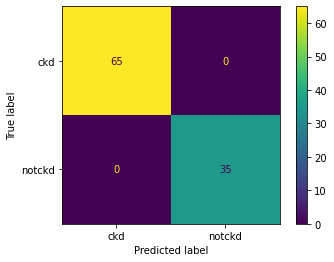

In [79]:
plot_confusion_matrix(logit, X_test_tr, y_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])